In [1]:
import xarray
import numpy as np
import pandas as pd

In [2]:
max_year = 6
path_LUH2 = 'D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/states.nc'
luh2_states = xarray.open_dataset(path_LUH2, engine="netcdf4", decode_times=False)

luh2_states_worldwide = luh2_states.isel(time=slice(1120, 1127))
luh2_states_worldwide['time'] = pd.date_range(start="1970-01-01", end="1976-01-01", freq='YS')
luh2_states_worldwide = luh2_states_worldwide.drop(['urban'])

c:\Users\HEFRY ANESTI\AppData\Local\Programs\Python\Python39\lib\site-packages\xarray\coding\times.py:167: SerializationWarning: Ambiguous reference date string: 850-01-01 0:0:0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0850-01-01 0:0:0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


In [3]:
transition_LUH2 = 'D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/transitions.nc'
luh2_trans = xarray.open_dataset(transition_LUH2, engine="netcdf4", decode_times=False)

luh2_trans_worldwide = luh2_trans.isel(time=slice(1120, 1127))
luh2_trans_worldwide['time'] = pd.date_range(start='1970-01-01', end='1976-01-01', freq='YS')
luh2_trans_worldwide = luh2_trans_worldwide.drop(['urban_to_range', 'primf_to_urban', 'primn_to_urban', 'secdf_to_urban', 'secdn_to_urban', 'primf_bioh', 'primn_bioh','secmf_bioh','secyf_bioh','secnf_bioh', "urban_to_secdf", "urban_to_secdn","urban_to_c3ann","urban_to_c4ann", "urban_to_c3per",
    "urban_to_c4per", "urban_to_c3nfx", "urban_to_pastr", "c3ann_to_urban", "c4ann_to_urban", "c3per_to_urban", "c4per_to_urban", "c3nfx_to_urban", "pastr_to_urban", "range_to_urban"])

In [4]:
## add the projection

luh2_added_states_worldwide = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/multiple-states_input4MIPs_landState_ScenarioMIP_UofMD-IMAGE-ssp119-2-1-f_gn_2015-2100.nc",\
                                        engine="netcdf4", decode_times=False)
luh2_added_trans = luh2_added_states_worldwide.drop_vars(['lat_bounds', 'lon_bounds', 'time_bnds'])
luh2_added_trans.coords['time'] = pd.date_range(start='2015-01-01', end='2100-01-01', freq='YS')

static = 'D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/staticData_quarterdeg.nc'
luh2_static = xarray.open_dataset(static, engine="netcdf4")

In [5]:
# ### Convert **ccode** to Country Name

country_code = pd.read_excel("D:/kerja/asisten riset/vol/milkunC/achaidir/LUH2 2022/ISO-3166-Country-Code.xlsx", engine="openpyxl")

ccode_iso = list(country_code['country-code'])
cname_iso = list(country_code['name'])

ccode_dict = {}
for i, ccode in enumerate(ccode_iso):
    ccode_dict[ccode] = cname_iso[i]

ccode_worldwide_int = luh2_static['ccode'].to_numpy().astype('int64')

ccode_convert = np.zeros((720, 1440), dtype="<U64")
for i in range(720):
    for j in range(1440):
        if (ccode_worldwide_int[i][j] in ccode_dict.keys()):
            ccode_convert[i][j] = ccode_dict[ccode_worldwide_int[i][j]]
        else:
            ccode_convert[i][j] = "Unknown"

In [6]:
# # Equation Adaptation
# carbon_stock_all = xarray.open_dataset("CARBON-STOCK-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4")
primf_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
secdf_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-SECDF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
primn_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMN-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
secdn_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-SECDN-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
c3ann_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
c4ann_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
c3per_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
c4per_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
c3nfx_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
range_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PRIMF-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)
pastr_carbon_density = xarray.open_dataset("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis2b_interpolate/CARBON-STOCK-PASTURE-INTERPOLATION-WORLDWIDE-1970_2100.nc", engine="netcdf4",)

#before interpolasi
pastr = xarray.open_dataset("/content/drive/MyDrive/Step 2b - Interpolation/PASTURELAND-1970-2100.nc")
range = xarray.open_dataset("/content/drive/MyDrive/Step 2b - Interpolation/PASTURELAND-1970-2100.nc")


In [7]:
landuse_class_all = ['primf', 'primn', 'secdf', 'secdn', 'c3ann', 'c4ann', 'c3per', 'c4per', 'c3nfx', 'pastr', 'range']
landuse_class_prim_secd = ['primf', 'primn', 'secdf', 'secdn']
landuse_class_pastr_crop = ['c3ann', 'c4ann', 'c3per', 'c4per', 'c3nfx', 'pastr', 'range']
landuse_class_secd = ['secdf','secdn']

carstock_biomass = ['branches', 'leaves', 'stems', 'roots']
carstock_soil = ['litter', 'humus', 'charcoal']

land_clearing_trans = ['primf_to_c3ann','primf_to_c4ann','primf_to_c3per','primf_to_c4per','primf_to_c3nfx','primf_to_pastr', 'primf_to_range',
                       'primn_to_c3ann','primn_to_c4ann','primn_to_c3per','primn_to_c4per','primn_to_c3nfx','primn_to_pastr', 'primn_to_range',
                       'secdf_to_c3ann','secdf_to_c4ann','secdf_to_c3per','secdf_to_c4per','secdf_to_c3nfx','secdf_to_pastr', 'secdf_to_range',
                       'secdn_to_c3ann','secdn_to_c4ann','secdn_to_c3per','secdn_to_c4per','secdn_to_c3nfx','secdn_to_pastr', 'secdn_to_range']

ajl_clearing = ['primf', 'primn', 'secdf', 'secdn']

# ### From

# %%
# Land Clearing
primf_to = ['primf_to_c3ann','primf_to_c4ann','primf_to_c3per','primf_to_c4per','primf_to_c3nfx','primf_to_pastr', 'primf_to_range']
secdf_to = ['secdf_to_c3ann','secdf_to_c4ann','secdf_to_c3per','secdf_to_c4per','secdf_to_c3nfx','secdf_to_pastr', 'secdf_to_range']
primn_to = ['primn_to_c3ann','primn_to_c4ann','primn_to_c3per','primn_to_c4per','primn_to_c3nfx','primn_to_pastr', 'primn_to_range']
secdn_to = ['secdn_to_c3ann','secdn_to_c4ann','secdn_to_c3per','secdn_to_c4per','secdn_to_c3nfx','secdn_to_pastr', 'secdn_to_range']

# Land Abandonment
primn_to_abandon = ['primn_to_secdf']
secdn_to_abandon = ['secdn_to_secdf']
c3ann_to_abandon = ['c3ann_to_secdf','c3ann_to_secdn']
c4ann_to_abandon = ['c4ann_to_secdf','c4ann_to_secdn']
c3per_to_abandon = ['c3per_to_secdf','c3per_to_secdn']
c4per_to_abandon = ['c4per_to_secdf','c4per_to_secdn']
c3nfx_to_abandon = ['c3nfx_to_secdf','c3nfx_to_secdn']
pastr_to_abandon = ['pastr_to_secdf','pastr_to_secdn']
range_to_abandon = ['range_to_secdf','range_to_secdn']

# Other Transitions
# Crop to Crop
c3ann_to_crop = ['c3ann_to_c4ann','c3ann_to_c3per','c3ann_to_c4per','c3ann_to_c3nfx']
c4ann_to_crop = ['c4ann_to_c3ann','c4ann_to_c3per','c4ann_to_c4per','c4ann_to_c3nfx']
c3per_to_crop = ['c3per_to_c3ann','c3per_to_c4ann','c3per_to_c4per','c3per_to_c3nfx']
c4per_to_crop = ['c4per_to_c3ann','c4per_to_c4ann','c4per_to_c3per','c4per_to_c3nfx']
c3nfx_to_crop = ['c3nfx_to_c3ann','c3nfx_to_c4ann','c3nfx_to_c3per','c3nfx_to_c4per']

# Crop to Pastr
c3ann_to_pastr = ['c3ann_to_pastr','c3ann_to_range']
c4ann_to_pastr = ['c4ann_to_pastr','c4ann_to_range']
c3per_to_pastr = ['c3per_to_pastr','c3per_to_range']
c4per_to_pastr = ['c4per_to_pastr','c4per_to_range']
c3nfx_to_pastr = ['c3nfx_to_pastr','c3nfx_to_range']

# Pasteur to Pasteur
pastr_to_pasture = ['pastr_to_range']
range_to_pasture = ['range_to_pastr']

# Pasteur to Crop
pastr_to_crop = ['pastr_to_c3ann','pastr_to_c4ann','pastr_to_c3per','pastr_to_c4ann','pastr_to_c3nfx']
range_to_crop = ['range_to_c3ann','range_to_c4ann','range_to_c3per','range_to_c4ann','range_to_c3nfx']


# %% [markdown]
# ### To

# %%
# Harvest
primf_harvest = ["primf_harv"]
primn_harvest = ["primn_harv"]
secmf_harvest = ["secmf_harv"]
secyf_harvest = ["secyf_harv"]
secnf_harvest = ["secnf_harv"]

# Land Clearing
c3ann_col = ["primf_to_c3ann", "secdf_to_c3ann", "primn_to_c3ann", "secdn_to_c3ann"]
c4ann_col = ["primf_to_c4ann", "secdf_to_c4ann", "primn_to_c4ann", "secdn_to_c4ann"]
c3per_col = ["primf_to_c3per", "secdf_to_c3per", "primn_to_c3per", "secdn_to_c3per"]
c4per_col = ["primf_to_c4per", "secdf_to_c4per", "primn_to_c4per", "secdn_to_c4per"]
c3nfx_col = ["primf_to_c3nfx", "secdf_to_c3nfx", "primn_to_c3nfx", "secdn_to_c3nfx"]
pastr_col = ["primf_to_pastr", "secdf_to_pastr", "primn_to_pastr", "secdn_to_pastr"]
range_col = ["primf_to_range", "secdf_to_range", "primn_to_range", "secdn_to_range"]

# Land Abandonment
secdf_abandon = ["primn_to_secdf","secdn_to_secdf","c3ann_to_secdf", "c4ann_to_secdf", "c3per_to_secdf", "c4per_to_secdf", "c3nfx_to_secdf", "pastr_to_secdf", "range_to_secdf"]
secdn_abandon = ["c3ann_to_secdn", "c4ann_to_secdn", "c3per_to_secdn", "c4per_to_secdn", "c3nfx_to_secdn", "pastr_to_secdn", "range_to_secdn"]

# Other Transition 
# Crop to Crop
c3ann_from_crop = ['c4ann_to_c3ann','c3per_to_c3ann','c4per_to_c3ann','c3nfx_to_c3ann']
c4ann_from_crop = ['c3ann_to_c4ann','c3per_to_c4ann','c4per_to_c4ann','c3nfx_to_c4ann']
c3per_from_crop = ['c3ann_to_c3per','c4ann_to_c3per','c4per_to_c3per','c3nfx_to_c3per']
c4per_from_crop = ['c3ann_to_c4per','c4ann_to_c4per','c3per_to_c4per','c3nfx_to_c4per']
c3nfx_from_crop = ['c3ann_to_c3nfx','c4ann_to_c3nfx','c3per_to_c3nfx','c4per_to_c3nfx']

# Crop to Pasteur
pastr_from_crop = ["pastr_to_c3ann","pastr_to_c4ann","pastr_to_c3per","pastr_to_c4per","pastr_to_c3nfx"]
range_from_crop = ["range_to_c3ann","range_to_c4ann","range_to_c3per","range_to_c4per","range_to_c3nfx"]

# Pasteur to Pasteur
pastr_from_pasture = ["range_to_pastr"]
range_from_pasture = ["pastr_to_range"]

# Pasteur to Crop
c3ann_from_pasture = ["pastr_to_c3ann","range_to_c3ann"]
c4ann_from_pasture = ["pastr_to_c4ann","range_to_c4ann"]
c3per_from_pasture = ["pastr_to_c3per","range_to_c3per"]
c4per_from_pasture = ["pastr_to_c4per","range_to_c4per"]
c3nfx_from_pasture = ["pastr_to_c3nfx","range_to_c3nfx"]


In [52]:

carbon_equ_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")

# Temporary array for the deduction of the area in other transitions for biomass
temp_area_deduction_croptocrop_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_area_deduction_croptopasture_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_area_deduction_pasturetopasture_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_area_deduction_pasturetocrop_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")

area_tf_abandon_other = np.zeros((max_year, 11, 720, 1440), dtype="float32")
decrement = np.zeros((max_year, 11, 720, 1440), dtype="float32")

area_updated_croptocrop_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_updated_croptopasture_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_updated_pasturetopasture_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_updated_pasturetocrop_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")

area_land_clearing_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_land_abandonment_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_croptocrop_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_croptopasture_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_pasturetopasture_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_pasturetocrop_bio = np.zeros((max_year, 11, 720, 1440), dtype="float32")

area_land_clearing_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
area_land_abandonment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")

temp_carbon_emit_trans_clear_bio = np.zeros((max_year, 56, 720, 1440), dtype="float32")
temp_carbon_emit_trans_abandon_bio = np.zeros((max_year, 32, 720, 1440), dtype="float32")
temp_carbon_emit_trans_croptocrop_bio = np.zeros((max_year, 40, 720, 1440), dtype="float32")
temp_carbon_emit_trans_croptopasture_bio = np.zeros((max_year, 20, 720, 1440), dtype="float32")
temp_carbon_emit_trans_pasturetopasture_bio = np.zeros((max_year, 4, 720, 1440), dtype="float32")
temp_carbon_emit_trans_pasturetocrop_bio = np.zeros((max_year, 20, 720, 1440), dtype="float32")

temp_carbon_emit_trans_clear_soil = np.zeros((max_year, 56, 720, 1440), dtype="float32")
temp_carbon_emit_trans_abandon_soil = np.zeros((max_year, 32, 720, 1440), dtype="float32")
temp_carbon_emit_trans_croptocrop_soil = np.zeros((max_year, 40, 720, 1440), dtype="float32")
temp_carbon_emit_trans_croptopasture_soil = np.zeros((max_year, 20, 720, 1440), dtype="float32")
temp_carbon_emit_trans_pasturetopasture_soil = np.zeros((max_year, 4, 720, 1440), dtype="float32")
temp_carbon_emit_trans_pasturetocrop_soil = np.zeros((max_year, 20, 720, 1440), dtype="float32")

# Carbon Density
## Biomass
carbon_density_primf_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_primn_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_secdf_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_secdn_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c3ann_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c4ann_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c3per_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c4per_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c3nfx_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_range_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_pastr_bio = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_all_bio = np.zeros((max_year, 720, 1440), dtype="float32")

## Soil
carbon_density_primf_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_primn_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_secdf_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_secdn_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c3ann_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c4ann_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c3per_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c4per_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_crop_c3nfx_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_range_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_pastr_soil = np.zeros((max_year, 720, 1440), dtype="float32")
carbon_density_all_soil = np.zeros((max_year, 720, 1440), dtype="float32")

temp_clear_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_abandon_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_croptocrop_from_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_croptocrop_to_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_croptopasture_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_pasturetopasture_from_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_pasturetopasture_to_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_pasturetocrop_increment_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")

temp_clear_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_abandon_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_croptocrop_from_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_croptocrop_to_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_croptopasture_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_pasturetopasture_from_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_pasturetopasture_to_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
temp_pasturetocrop_increment_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")

carbon_equ_abandon_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_croptocrop_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_croptopasture_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_pasturetocrop_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_pasturetopasture_biomass = np.zeros((max_year, 11, 720, 1440), dtype="float32")

carbon_equ_abandon_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_croptocrop_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_croptopasture_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_pasturetocrop_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")
carbon_equ_pasturetopasture_soil = np.zeros((max_year, 11, 720, 1440), dtype="float32")

all_to_c3ann = np.zeros((max_year, 720, 1440), dtype="float32")
all_to_c4ann = np.zeros((max_year, 720, 1440), dtype="float32")
all_to_c3per = np.zeros((max_year, 720, 1440), dtype="float32")
all_to_c4per = np.zeros((max_year, 720, 1440), dtype="float32")
all_to_c3nfx = np.zeros((max_year, 720, 1440), dtype="float32")
all_to_pastr = np.zeros((max_year, 720, 1440), dtype="float32")
all_to_range = np.zeros((max_year, 720, 1440), dtype="float32")
all_to_crops = np.zeros((max_year, 720, 1440), dtype="float32")


In [53]:
# ### Biomass
for time_idx in range(max_year):
    for biomass_class in carstock_biomass:
        carbon_density_primf_bio[time_idx] += primf_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_primn_bio[time_idx] += primn_carbon_density['primn_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_secdf_bio[time_idx] += secdf_carbon_density['secdf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_secdn_bio[time_idx] += secdn_carbon_density['secdn_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_crop_c3ann_bio[time_idx] += c3ann_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_crop_c4ann_bio[time_idx] += c4ann_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_crop_c3per_bio[time_idx] += c3per_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_crop_c4per_bio[time_idx] += c4per_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        carbon_density_crop_c3nfx_bio[time_idx] += c3nfx_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        
        if np.isnan(range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()): #jika di tahun 1971 nan maka ambil data asli di tahun 1970
            if time_idx != 0 and time_idx <= 5:
                if time_idx <= 3:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=0).sel(NBP=biomass_class).to_numpy()
                else: 
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=1).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 5 and time_idx <= 10:
                if time_idx <= 8:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=1).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=2).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 10 and time_idx <= 15:
                if time_idx <= 13:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=2).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=3).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 15 and time_idx <= 20:
                if time_idx <= 18:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=3).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=4).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 20 and time_idx <= 25:
                if time_idx <= 23:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=4).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=5).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 25 and time_idx <= 30:
                if time_idx <= 28:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=5).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=6).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 30 and time_idx <= 35:
                if time_idx <= 33:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=6).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=7).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 35 and time_idx <= 40:
                if time_idx <= 38:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=7).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=8).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 40 and time_idx <= 45:
                if time_idx <= 43:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=8).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=9).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 45 and time_idx <= 50:
                if time_idx <= 48:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=9).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=10).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 50 and time_idx <= 55:
                if time_idx <= 53:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=10).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=11).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 55 and time_idx <= 60:
                if time_idx <= 58:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=11).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=12).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 60 and time_idx <= 65:
                if time_idx <= 63:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=12).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=13).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 65 and time_idx <= 70:
                if time_idx <= 68:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=13).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=14).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 70 and time_idx <= 75:
                if time_idx <= 73:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=14).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=15).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 75 and time_idx <= 80:
                if time_idx <= 78:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=15).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=16).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 80 and time_idx <= 85:
                if time_idx <= 83:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=16).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=17).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 85 and time_idx <= 90:
                if time_idx <= 88:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=17).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=18).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 90 and time_idx <= 95:
                if time_idx <= 93:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=18).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=19).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 95 and time_idx <= 100:
                if time_idx <= 98:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=19).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=20).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 100 and time_idx <= 105:
                if time_idx <= 103:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=20).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=21).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 105 and time_idx <= 110:
                if time_idx <= 108:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=21).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=22).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 110 and time_idx <= 115:
                if time_idx <= 113:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=22).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=23).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 115 and time_idx <= 120:
                if time_idx <= 118:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=23).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=24).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 120 and time_idx <= 125:
                if time_idx <= 123:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=24).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=25).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 125 and time_idx <= 130:
                if time_idx <= 128:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=25).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_range_bio[time_idx] += range['extensive grassland'].isel(time=26).sel(NBP=biomass_class).to_numpy()            
            else:
                carbon_density_range_bio[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        
        elif np.isnan(pastr_carbon_density['pastr_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()):
            if time_idx != 0 and time_idx <= 5:
                if time_idx <= 3:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=0).sel(NBP=biomass_class).to_numpy()
                else: 
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=1).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 5 and time_idx <= 10:
                if time_idx <= 8:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=1).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=2).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 10 and time_idx <= 15:
                if time_idx <= 13:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=2).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=3).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 15 and time_idx <= 20:
                if time_idx <= 18:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=3).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=4).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 20 and time_idx <= 25:
                if time_idx <= 23:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=4).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=5).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 25 and time_idx <= 30:
                if time_idx <= 28:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=5).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=6).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 30 and time_idx <= 35:
                if time_idx <= 33:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=6).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=7).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 35 and time_idx <= 40:
                if time_idx <= 38:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=7).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=8).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 40 and time_idx <= 45:
                if time_idx <= 43:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=8).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=9).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 45 and time_idx <= 50:
                if time_idx <= 48:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=9).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=10).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 50 and time_idx <= 55:
                if time_idx <= 53:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=10).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=11).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 55 and time_idx <= 60:
                if time_idx <= 58:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=11).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=12).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 60 and time_idx <= 65:
                if time_idx <= 63:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=12).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=13).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 65 and time_idx <= 70:
                if time_idx <= 68:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=13).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=14).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 70 and time_idx <= 75:
                if time_idx <= 73:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=14).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=15).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 75 and time_idx <= 80:
                if time_idx <= 78:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=15).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=16).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 80 and time_idx <= 85:
                if time_idx <= 83:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=16).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=17).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 85 and time_idx <= 90:
                if time_idx <= 88:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=17).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=18).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 90 and time_idx <= 95:
                if time_idx <= 93:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=18).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=19).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 95 and time_idx <= 100:
                if time_idx <= 98:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=19).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=20).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 100 and time_idx <= 105:
                if time_idx <= 103:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=20).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=21).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 105 and time_idx <= 110:
                if time_idx <= 108:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=21).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=22).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 110 and time_idx <= 115:
                if time_idx <= 113:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=22).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=23).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 115 and time_idx <= 120:
                if time_idx <= 118:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=23).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=24).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 120 and time_idx <= 125:
                if time_idx <= 123:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=24).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=25).sel(NBP=biomass_class).to_numpy()
            elif time_idx > 125 and time_idx <= 130:
                if time_idx <= 128:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=25).sel(NBP=biomass_class).to_numpy()
                else:
                    carbon_density_pastr_bio[time_idx] += pastr['extensive grassland'].isel(time=26).sel(NBP=biomass_class).to_numpy()            
            else:
                carbon_density_pastr_bio[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        else:
            carbon_density_range_bio[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
            carbon_density_pastr_bio[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        # carbon_density_range_bio[time_idx] += range_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
        # carbon_density_pastr_bio[time_idx] += range_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=biomass_class).to_numpy()
            
    carbon_density_all_bio[time_idx] += carbon_density_primf_bio[time_idx]+carbon_density_primn_bio[time_idx]+carbon_density_secdf_bio[time_idx]+carbon_density_secdn_bio[time_idx]+\
                                    carbon_density_crop_c3ann_bio[time_idx]+carbon_density_crop_c4ann_bio[time_idx]+carbon_density_crop_c3per_bio[time_idx]+\
                                    carbon_density_crop_c4per_bio[time_idx]+carbon_density_range_bio[time_idx]+carbon_density_pastr_bio[time_idx]

# Equation 10
for time_idx in range(max_year):
    for i, col in enumerate(landuse_class_all):
        carbon_equ_biomass[time_idx][i] += luh2_static['carea'].to_numpy()*carbon_density_all_bio[time_idx]*\
                                    np.nan_to_num(luh2_states_worldwide[col].isel(time=time_idx).to_numpy())

In [56]:
# #### Land Clearing

# ##### From
# Equation 10 (Land Clearing)
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_prim_secd):
            for k, colk in enumerate(land_clearing_trans):
                if (j == 0):
                    if (k <= 6):
                        if np.isnan(luh2_trans_worldwide[colk].isel(time=time_idx).any()):
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.nan

                        else:
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            (luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_primf_bio[time_idx]))
                        temp_clear_increment_biomass[time_idx][j] += temp_carbon_emit_trans_clear_bio[time_idx][k]

                elif (j == 1):
                    if (6 < k <= 13):
                        if np.isnan(luh2_trans_worldwide[colk].isel(time=time_idx).any()):
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.nan

                        else:
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            (luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_primn_bio[time_idx]))
                        temp_clear_increment_biomass[time_idx][j] += temp_carbon_emit_trans_clear_bio[time_idx][k]

                elif (j == 2):
                    if (13 < k <= 20):
                        if np.isnan(luh2_trans_worldwide[colk].isel(time=time_idx).any()):
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.nan

                        else:
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            (luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_secdf_bio[time_idx]))
                        temp_clear_increment_biomass[time_idx][j] += temp_carbon_emit_trans_clear_bio[time_idx][k]

                elif (j == 3):
                    if (20 < k <= 27):
                        if np.isnan(luh2_trans_worldwide[colk].isel(time=time_idx).any()):
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.nan

                        else:
                            temp_carbon_emit_trans_clear_bio[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            (luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_secdn_bio[time_idx]))
                        temp_clear_increment_biomass[time_idx][j] += temp_carbon_emit_trans_clear_bio[time_idx][k]

        carbon_equ_biomass[time_idx] -= temp_clear_increment_biomass[time_idx]

# ##### To
# Equation 14
for time_idx in range(max_year):
    if (0 < time_idx <= max_year-1):
        for i, col in enumerate(landuse_class_pastr_crop):
            if (i == 0):
                for j, c3ann_trans in enumerate(c3ann_col):
                    if np.isnan(luh2_trans_worldwide[c3ann_trans].isel(time=time_idx).any()):
                        temp_carbon_emit_trans_clear_bio[time_idx][j+28] = np.nan

                        area_land_clearing_bio[time_idx][i+4] += np.nan

                    else: 
                        temp_carbon_emit_trans_clear_bio[time_idx][j+28] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       (luh2_trans_worldwide[c3ann_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c3ann_bio[time_idx]))
                        
                        area_land_clearing_bio[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 (luh2_trans_worldwide[c3ann_trans].isel(time=time_idx).to_numpy())))
                    
                    temp_clear_increment_biomass[time_idx][i+4] += temp_carbon_emit_trans_clear_bio[time_idx][j+28] 
                    all_to_c3ann[time_idx] += temp_clear_increment_biomass[time_idx][i+4]

                carbon_equ_biomass[time_idx][i+4] += temp_clear_increment_biomass[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c3ann[time_idx]
                
            elif (i == 1):
                for j,c4ann_trans in enumerate(c4ann_col):
                    if np.isnan(luh2_trans_worldwide[c4ann_trans].isel(time=time_idx).any()):
                        temp_carbon_emit_trans_clear_bio[time_idx][j+32] = np.nan
                        area_land_clearing_bio[time_idx][i+4] += np.nan
                    else: 
                        temp_carbon_emit_trans_clear_bio[time_idx][j+32] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       (luh2_trans_worldwide[c4ann_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c4ann_bio[time_idx]))
                        
                        area_land_clearing_bio[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    (luh2_trans_worldwide[c4ann_trans].isel(time=time_idx).to_numpy())))
                    
                    temp_clear_increment_biomass[time_idx][i+4] += temp_carbon_emit_trans_clear_bio[time_idx][j+32]
                    all_to_c4ann[time_idx] += temp_clear_increment_biomass[time_idx][i+4]

                carbon_equ_biomass[time_idx][i+4] += temp_clear_increment_biomass[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c4ann[time_idx]
                
            elif (i == 2):
                for j,c3per_trans in enumerate(c3per_col):
                    if np.isnan(luh2_trans_worldwide[c3per_trans].isel(time=time_idx).any()):
                        temp_carbon_emit_trans_clear_bio[time_idx][j+36] = np.nan
                        area_land_clearing_bio[time_idx][i+4] += np.nan
                    else:
                        temp_carbon_emit_trans_clear_bio[time_idx][j+36] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       (luh2_trans_worldwide[c3per_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c3per_bio[time_idx]))
                        area_land_clearing_bio[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 (luh2_trans_worldwide[c3per_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_biomass[time_idx][i+4] += temp_carbon_emit_trans_clear_bio[time_idx][j+36]
                    all_to_c3per[time_idx] += temp_clear_increment_biomass[time_idx][i+4]

                carbon_equ_biomass[time_idx][i+4] += temp_clear_increment_biomass[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c3per[time_idx]
                
            elif (i == 3):
                for j,c4per_trans in enumerate(c4per_col):
                    if np.isnan(luh2_trans_worldwide[c4per_trans].isel(time=time_idx).any()):
                        temp_carbon_emit_trans_clear_bio[time_idx][j+40] = np.nan
                        area_land_clearing_bio[time_idx][i+4] += np.nan
                    else:
                        temp_carbon_emit_trans_clear_bio[time_idx][j+40] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       (luh2_trans_worldwide[c4per_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c4per_bio[time_idx]))
                        area_land_clearing_bio[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    (luh2_trans_worldwide[c4per_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_biomass[time_idx][i+4] += temp_carbon_emit_trans_clear_bio[time_idx][j+40]
                    all_to_c4per[time_idx] += temp_clear_increment_biomass[time_idx][i+4]

                carbon_equ_biomass[time_idx][i+4] += temp_clear_increment_biomass[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c4per[time_idx]
                
            elif (i == 4):
                for j,c3nfx_trans in enumerate(c3nfx_col):
                    if np.isnan(luh2_trans_worldwide[c3nfx_trans].isel(time=time_idx).any()):
                        temp_carbon_emit_trans_clear_bio[time_idx][j+44] = np.nan
                        area_land_clearing_bio[time_idx][i+4] += np.nan
                    else:
                        temp_carbon_emit_trans_clear_bio[time_idx][j+44] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       (luh2_trans_worldwide[c3nfx_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c3nfx_bio[time_idx]))
                        area_land_clearing_bio[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    (luh2_trans_worldwide[c3nfx_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_biomass[time_idx][i+4] += temp_carbon_emit_trans_clear_bio[time_idx][j+44]
                    all_to_c3nfx[time_idx] += temp_clear_increment_biomass[time_idx][i+4]

                carbon_equ_biomass[time_idx][i+4] += temp_clear_increment_biomass[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c3nfx[time_idx]
                
            elif (i == 5):
                for j,pastr_trans in enumerate(pastr_col):
                    if np.isnan(luh2_trans_worldwide[pastr_trans].isel(time=time_idx).any()):
                        temp_carbon_emit_trans_clear_bio[time_idx][j+48] = np.nan
                        area_land_clearing_bio[time_idx][i+4] += np.nan
                    else:
                        temp_carbon_emit_trans_clear_bio[time_idx][j+48] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       (luh2_trans_worldwide[pastr_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_pastr_bio[time_idx]))
                        area_land_clearing_bio[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    (luh2_trans_worldwide[pastr_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_biomass[time_idx][i+4] += temp_carbon_emit_trans_clear_bio[time_idx][j+48]
                    all_to_pastr[time_idx] += temp_clear_increment_biomass[time_idx][i+4]

                carbon_equ_biomass[time_idx][i+4] += temp_clear_increment_biomass[time_idx][i+4]
                all_to_crops[time_idx] += all_to_pastr[time_idx]
                
            elif (i==6):
                for j,range_trans in enumerate(range_col):
                    if np.isnan(luh2_trans_worldwide[range_trans].isel(time=time_idx).any()):
                        temp_carbon_emit_trans_clear_bio[time_idx][j+52] = np.nan
                        area_land_clearing_bio[time_idx][i+4] += np.nan
                    else:
                        temp_carbon_emit_trans_clear_bio[time_idx][j+52] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       (luh2_trans_worldwide[range_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_range_bio[time_idx]))
                        area_land_clearing_bio[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 (luh2_trans_worldwide[range_trans].isel(time=time_idx).to_numpy())))
                        
                    temp_clear_increment_biomass[time_idx][i+4] += temp_carbon_emit_trans_clear_bio[time_idx][j+52]
                    all_to_range[time_idx] += temp_clear_increment_biomass[time_idx][i+4]

                carbon_equ_biomass[time_idx][i+4] += temp_clear_increment_biomass[time_idx][i+4]
                all_to_crops[time_idx] += all_to_range[time_idx]


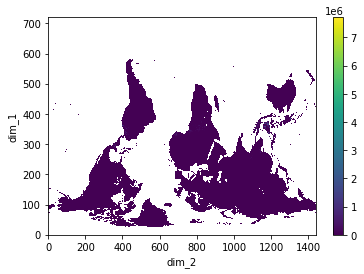

In [70]:
xarray.DataArray(all_to_c3per).isel(dim_0=3).plot()

In [12]:
# #### Land Abandonment

# ##### From

# %%
for time_index in range(max_year):
    if (time_index<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i, primn_trans_col in enumerate(primn_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                      np.nan_to_num(luh2_trans_worldwide[primn_trans_col].isel(time=time_idx).to_numpy()),
                                                                                      carbon_density_primn_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+1] += temp_carbon_emit_trans_abandon_bio[time_idx][i]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]
                    
                for i,c3ann_trans_col in enumerate(c3ann_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+2] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c3ann_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c3ann_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_abandon_bio[time_idx][i+2]
                carbon_equ_abandon_biomass[time_idx][j+4]= carbon_equ_biomass[time_idx] [j+4]- temp_abandon_increment_biomass[time_idx][j+4]
                        
            elif (j == 1):
                for i,secdn_trans_col in enumerate(secdn_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+1] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[secdn_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_secdn_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+2] += temp_carbon_emit_trans_abandon_bio[time_idx][i+1]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]
                
                for i,c4ann_trans_col in enumerate(c4ann_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c4ann_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c4ann_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_abandon_bio[time_idx][i+4]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]
                
            elif (j == 2):
                for i,c3per_trans_col in enumerate(c3per_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+6] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c3per_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c3per_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_abandon_bio[time_idx][i+6]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]
                
            elif (j == 3):
                for i,c4per_trans_col in enumerate(c4per_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+8] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c4per_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c4per_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_abandon_bio[time_idx][i+8]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]
                
            elif (j == 4):
                for i,c3nfx_trans_col in enumerate(c3nfx_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+10] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[c3nfx_trans_col].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_crop_c3nfx_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_abandon_bio[time_idx][i+10]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]
                
            elif (j == 5):
                for i,pastr_trans_col in enumerate(pastr_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+12] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[pastr_trans_col].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_pastr_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_abandon_bio[time_idx][i+12]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]
                
            elif (j == 6):
                for i,range_trans_col in enumerate(range_to_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+14] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[range_trans_col].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_range_bio[time_idx]))
                    temp_abandon_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_abandon_bio[time_idx][i+14]
                carbon_equ_abandon_biomass[time_idx] = carbon_equ_biomass[time_idx] - temp_abandon_increment_biomass[time_idx]

# %% [markdown]
# ##### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, col in enumerate(landuse_class_secd):
            if (j == 0):
                for i,secdf_trans in enumerate(secdf_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+16] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[secdf_trans].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_secdf_bio[time_idx]))
                    area_land_abandonment_bio[time_idx][j+2] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    np.nan_to_num(luh2_trans_worldwide[secdf_trans].isel(time=time_idx).to_numpy())))
                    temp_abandon_increment_biomass[time_idx][j+2] += temp_carbon_emit_trans_abandon_bio[time_idx][i+16]
                carbon_equ_abandon_biomass[time_idx][j+2] = carbon_equ_biomass[time_idx][j+2] + temp_abandon_increment_biomass[time_idx][j+2]
                
            elif (j == 1):
                for i,secdn_trans in enumerate(secdn_abandon):
                    temp_carbon_emit_trans_abandon_bio[time_idx][i+25] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[secdn_trans].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_secdn_bio[time_idx]))
                    area_land_abandonment_bio[time_idx][j+2] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    np.nan_to_num(luh2_trans_worldwide[secdn_trans].isel(time=time_idx).to_numpy())))
                    temp_abandon_increment_biomass[time_idx][j+2] += temp_carbon_emit_trans_abandon_bio[time_idx][i+25]
                carbon_equ_abandon_biomass[time_idx][j+2] = carbon_equ_biomass[time_idx][j+2] + temp_abandon_increment_biomass[time_idx][j+2]


In [13]:
# ##### Updated Area Transfer

# %%
for time_idx in range(max_year):
    for j, colj in enumerate(landuse_class_pastr_crop):
        if (j == 0):
            for c3ann_trans_col in c3ann_to_abandon:
                decrement[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                np.nan_to_num(luh2_trans_worldwide[c3ann_trans_col].isel(time=time_idx).to_numpy())))
            area_tf_abandon_other[time_idx][j+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_states_worldwide[colj].isel(time=time_idx).to_numpy()))) - decrement[time_idx][j+4]
            
        elif (j == 1):
            for c4ann_trans_col in c4ann_to_abandon:
                decrement[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                np.nan_to_num(luh2_trans_worldwide[c4ann_trans_col].isel(time=time_idx).to_numpy())))
            area_tf_abandon_other[time_idx][j+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_states_worldwide[colj].isel(time=time_idx).to_numpy()))) - decrement[time_idx][j+4]
            
        elif (j == 2):
            for c3per_trans_col in c3per_to_abandon:
                decrement[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                np.nan_to_num(luh2_trans_worldwide[c3per_trans_col].isel(time=time_idx).to_numpy())))
            area_tf_abandon_other[time_idx][j+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_states_worldwide[colj].isel(time=time_idx).to_numpy()))) - decrement[time_idx][j+4]
            
        elif (j == 3):
            for c4per_trans_col in c4per_to_abandon:
                decrement[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                np.nan_to_num(luh2_trans_worldwide[c4per_trans_col].isel(time=time_idx).to_numpy())))
            area_tf_abandon_other[time_idx][j+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_states_worldwide[colj].isel(time=time_idx).to_numpy()))) - decrement[time_idx][j+4]
            
        elif (j == 4):
            for c3nfx_trans_col in c3nfx_to_abandon:
                decrement[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                np.nan_to_num(luh2_trans_worldwide[c3nfx_trans_col].isel(time=time_idx).to_numpy())))
            area_tf_abandon_other[time_idx][j+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_states_worldwide[colj].isel(time=time_idx).to_numpy()))) - decrement[time_idx][j+4]
            
        elif (j == 5):
            for pastr_trans_col in pastr_to_abandon:
                decrement[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                np.nan_to_num(luh2_trans_worldwide[pastr_trans_col].isel(time=time_idx).to_numpy())))
            area_tf_abandon_other[time_idx][j+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_states_worldwide[colj].isel(time=time_idx).to_numpy()))) - decrement[time_idx][j+4]
            
        elif (j == 6):
            for range_trans_col in range_to_abandon:
                decrement[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                np.nan_to_num(luh2_trans_worldwide[range_trans_col].isel(time=time_idx).to_numpy())))
            area_tf_abandon_other[time_idx][j+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_states_worldwide[colj].isel(time=time_idx).to_numpy()))) - decrement[time_idx][j+4]


In [14]:
# #### Other Transition
# ##### Crop to Crop
# ###### From

for time_idx in range(max_year):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_to in enumerate(c3ann_to_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[c3ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_crop_c3ann_bio[time_idx]))
                    temp_croptocrop_from_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i]
                    temp_area_deduction_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                             np.nan_to_num(luh2_trans_worldwide[c3ann_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptocrop_biomass[time_idx] = carbon_equ_abandon_biomass[time_idx] - temp_croptocrop_from_increment_biomass[time_idx]
                area_updated_croptocrop_bio[time_idx][j+4] = area_tf_abandon_other[time_idx][j+4]-temp_area_deduction_croptocrop_bio[time_idx][j+4]
                
            elif (j == 1):
                for i,c4ann_other_to in enumerate(c4ann_to_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                           np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                           carbon_density_crop_c4ann_bio[time_idx]))
                    temp_croptocrop_from_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+4]
                    temp_area_deduction_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                             np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptocrop_biomass[time_idx] = carbon_equ_abandon_biomass[time_idx] - temp_croptocrop_from_increment_biomass[time_idx]
                area_updated_croptocrop_bio[time_idx][j+4] = area_tf_abandon_other[time_idx][j+4]-temp_area_deduction_croptocrop_bio[time_idx][j+4]
                
            elif (j == 2):
                for i,c3per_other_to in enumerate(c3per_to_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+8] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                           np.nan_to_num(luh2_trans_worldwide[c3per_other_to].isel(time=time_idx).to_numpy()),
                                                                                           carbon_density_crop_c3per_bio[time_idx]))
                    temp_croptocrop_from_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+8]
                    temp_area_deduction_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                             np.nan_to_num(luh2_trans_worldwide[c3per_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptocrop_biomass[time_idx] = carbon_equ_abandon_biomass[time_idx] - temp_croptocrop_from_increment_biomass[time_idx]
                area_updated_croptocrop_bio[time_idx][j+4] = area_tf_abandon_other[time_idx][j+4]-temp_area_deduction_croptocrop_bio[time_idx][j+4]
                
            elif (j == 3):
                for i,c4per_other_to in enumerate(c4per_to_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+12] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c4per_other_to].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4per_bio[time_idx]))
                    temp_croptocrop_from_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+12]
                    temp_area_deduction_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                             np.nan_to_num(luh2_trans_worldwide[c4per_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptocrop_biomass[time_idx] = carbon_equ_abandon_biomass[time_idx] - temp_croptocrop_from_increment_biomass[time_idx]
                area_updated_croptocrop_bio[time_idx][j+4] = area_tf_abandon_other[time_idx][j+4]-temp_area_deduction_croptocrop_bio[time_idx][j+4]
                
            elif (j == 4):
                for i,c3nfx_other in enumerate(c3nfx_to_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+16] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3nfx_other].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4per_bio[time_idx]))
                    temp_croptocrop_from_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+16]
                    temp_area_deduction_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                             np.nan_to_num(luh2_trans_worldwide[c3nfx_other].isel(time=time_idx).to_numpy())))
                carbon_equ_croptocrop_biomass[time_idx] = carbon_equ_abandon_biomass[time_idx] - temp_croptocrop_from_increment_biomass[time_idx]
                area_updated_croptocrop_bio[time_idx][j+4] = area_tf_abandon_other[time_idx][j+4]-temp_area_deduction_croptocrop_bio[time_idx][j+4]


# ###### To

for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_from in enumerate(c3ann_from_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+20] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3ann_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3ann_bio[time_idx]))
                    area_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                              np.nan_to_num(luh2_trans_worldwide[c3ann_other_from].isel(time=time_idx).to_numpy())))
                    temp_croptocrop_to_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+20]
                    all_to_c3ann[time_idx] += temp_croptocrop_to_increment_biomass[time_idx][i+4]

                carbon_equ_croptocrop_biomass[time_idx][j+4] = carbon_equ_abandon_biomass[time_idx][j+4] + temp_croptocrop_to_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3ann[time_idx]

            elif (j == 1):
                for i,c4ann_other_from in enumerate(c4ann_from_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+24] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c4ann_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4ann_bio[time_idx]))
                    area_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                              np.nan_to_num(luh2_trans_worldwide[c4ann_other_from].isel(time=time_idx).to_numpy())))
                    temp_croptocrop_to_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+24]
                    all_to_c4ann[time_idx] += temp_croptocrop_to_increment_biomass[time_idx][i+4]

                carbon_equ_croptocrop_biomass[time_idx][j+4] = carbon_equ_abandon_biomass[time_idx][j+4] + temp_croptocrop_to_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4ann[time_idx]
                
            elif (j == 2):
                for i,c3per_other_from in enumerate(c3per_from_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+28] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3per_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3per_bio[time_idx]))
                    area_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                              np.nan_to_num(luh2_trans_worldwide[c3per_other_from].isel(time=time_idx).to_numpy())))
                    temp_croptocrop_to_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+28]
                    all_to_c3per[time_idx] += temp_croptocrop_to_increment_biomass[time_idx][i+4]

                carbon_equ_croptocrop_biomass[time_idx][j+4] = carbon_equ_abandon_biomass[time_idx][j+4] + temp_croptocrop_to_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3per[time_idx]
                
            elif (j == 3):
                for i,c4per_other_from in enumerate(c4per_from_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+32] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c4per_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4per_bio[time_idx]))
                    area_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                              np.nan_to_num(luh2_trans_worldwide[c4per_other_from].isel(time=time_idx).to_numpy())))
                    temp_croptocrop_to_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+32]
                    all_to_c4per[time_idx] += temp_croptocrop_to_increment_biomass[time_idx][i+4]

                carbon_equ_croptocrop_biomass[time_idx][j+4] = carbon_equ_abandon_biomass[time_idx][j+4] + temp_croptocrop_to_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4per[time_idx]
                
            elif (j == 4):
                for i,c3nfx_other_from in enumerate(c3nfx_from_crop):
                    temp_carbon_emit_trans_croptocrop_bio[time_idx][i+36] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3nfx_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3nfx_bio[time_idx]))
                    area_croptocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                              np.nan_to_num(luh2_trans_worldwide[c3nfx_other_from].isel(time=time_idx).to_numpy())))
                    temp_croptocrop_to_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_bio[time_idx][i+36]
                    all_to_c3nfx[time_idx] += temp_croptocrop_to_increment_biomass[time_idx][i+4]

                carbon_equ_croptocrop_biomass[time_idx][j+4] = carbon_equ_abandon_biomass[time_idx][j+4] + temp_croptocrop_to_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3nfx[time_idx]


In [15]:
# %% [markdown]
# ##### Crop to Pasteur

# %% [markdown]
# ###### From

# %%
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_to in enumerate(c3ann_to_pastr):
                    temp_carbon_emit_trans_croptopasture_bio[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3ann_bio[time_idx]))
                    temp_croptopasture_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_bio[time_idx][i]
                    temp_area_deduction_croptopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[c3ann_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptopasture_biomass[time_idx] = carbon_equ_croptocrop_biomass[time_idx] - temp_croptopasture_increment_biomass[time_idx]
                area_updated_croptopasture_bio[time_idx][j+4] = area_updated_croptocrop_bio[time_idx][j+4]-temp_area_deduction_croptopasture_bio[time_idx][j+4]
                
            elif (j == 1):
                for i,c4ann_other_to in enumerate(c4ann_to_pastr):
                    temp_carbon_emit_trans_croptopasture_bio[time_idx][i+2] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c4ann_bio[time_idx]))
                    temp_croptopasture_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_bio[time_idx][i+2]
                    temp_area_deduction_croptopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptopasture_biomass[time_idx] = carbon_equ_croptocrop_biomass[time_idx] - temp_croptopasture_increment_biomass[time_idx]
                area_updated_croptopasture_bio[time_idx][j+4] = area_updated_croptocrop_bio[time_idx][j+4]-temp_area_deduction_croptopasture_bio[time_idx][j+4]
                
            elif (j == 2):
                for i,c3per_other_to in enumerate(c3per_to_pastr):
                    temp_carbon_emit_trans_croptopasture_bio[time_idx][i+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c3per_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c3per_bio[time_idx]))
                    temp_croptopasture_increment_biomass[time_idx][j+6] += temp_carbon_emit_trans_croptopasture_bio[time_idx][i+4]
                    temp_area_deduction_croptopasture_bio[time_idx][j+6] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[c3per_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptopasture_biomass[time_idx] = carbon_equ_croptocrop_biomass[time_idx] - temp_croptopasture_increment_biomass[time_idx]
                area_updated_croptopasture_bio[time_idx][j+4] = area_updated_croptocrop_bio[time_idx][j+4]-temp_area_deduction_croptopasture_bio[time_idx][j+4]
                
            elif (j == 3):
                for i,c4per_other_to in enumerate(c4per_to_pastr):
                    temp_carbon_emit_trans_croptopasture_bio[time_idx][i+6] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c4per_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c4per_bio[time_idx]))                                                        
                    temp_croptopasture_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_bio[time_idx][i+6]
                    temp_area_deduction_croptopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[c4per_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptopasture_biomass[time_idx] = carbon_equ_croptocrop_biomass[time_idx] - temp_croptopasture_increment_biomass[time_idx]
                area_updated_croptopasture_bio[time_idx][j+4] = area_updated_croptocrop_bio[time_idx][j+4]-temp_area_deduction_croptopasture_bio[time_idx][j+4]
                
            elif (j == 4):
                for c3nfx_other_to in c3nfx_to_pastr:
                    temp_carbon_emit_trans_croptopasture_bio[time_idx][i+8] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c3nfx_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c3nfx_bio[time_idx]))                                                        
                    temp_croptopasture_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_bio[time_idx][i+8]
                    temp_area_deduction_croptopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[c3nfx_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_croptopasture_biomass[time_idx] = carbon_equ_croptocrop_biomass[time_idx] - temp_croptopasture_increment_biomass[time_idx]
                area_updated_croptopasture_bio[time_idx][j+4] = area_updated_croptocrop_bio[time_idx][j+4]-temp_area_deduction_croptopasture_bio[time_idx][j+4]

# ###### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_from in enumerate(pastr_from_crop):
                    temp_carbon_emit_trans_croptopasture_bio[time_idx][i+10] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[pastr_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_pastr_bio[time_idx]))
                    area_croptopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_trans_worldwide[pastr_other_from].isel(time=time_idx).to_numpy())))
                    temp_croptopasture_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_bio[time_idx][i+10]
                    all_to_pastr[time_idx] += temp_croptopasture_increment_biomass[time_idx][i+4]

                carbon_equ_croptopasture_biomass[time_idx][j+4] = carbon_equ_croptocrop_biomass[time_idx][j+4] + temp_croptopasture_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_pastr[time_idx]
                
            elif (j == 6):
                for i,range_other_from in enumerate(range_from_crop):
                    temp_carbon_emit_trans_croptopasture_bio[time_idx][i+15] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[range_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_range_bio[time_idx]))
                    area_croptopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                       np.nan_to_num(luh2_trans_worldwide[range_other_from].isel(time=time_idx).to_numpy())))
                    temp_croptopasture_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_bio[time_idx][i+15]
                    all_to_pastr[time_idx] += temp_croptopasture_increment_biomass[time_idx][i+4]

                carbon_equ_croptopasture_biomass[time_idx][j+4] = carbon_equ_croptocrop_biomass[time_idx][j+4] + temp_croptopasture_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_pastr[time_idx]


In [18]:
# %% [markdown]
# ##### Pasture to Pasture

# %% [markdown]
# ###### From

# %%
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_to in enumerate(pastr_to_pasture):
                    temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[pastr_other_to].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_pastr_bio[time_idx]))
                    temp_pasturetopasture_from_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i]
                    temp_area_deduction_pasturetopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                   np.nan_to_num(luh2_trans_worldwide[pastr_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_pasturetopasture_biomass[time_idx] = carbon_equ_croptopasture_biomass[time_idx] - temp_pasturetopasture_from_increment_biomass[time_idx]
                area_updated_pasturetopasture_bio[time_idx][j+4] = area_tf_abandon_other[time_idx][j+4]-temp_area_deduction_pasturetopasture_bio[time_idx][j+4]
                
            elif (j == 6):
                for i,range_other_to in enumerate(range_to_pasture):
                    temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i+1] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                 np.nan_to_num(luh2_trans_worldwide[range_other_to].isel(time=time_idx).to_numpy()),
                                                                                                 carbon_density_range_bio[time_idx]))
                    temp_pasturetopasture_from_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i+1]
                    temp_area_deduction_pasturetopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                   np.nan_to_num(luh2_trans_worldwide[range_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_pasturetopasture_biomass[time_idx] = carbon_equ_croptopasture_biomass[time_idx] - temp_pasturetopasture_from_increment_biomass[time_idx]
                area_updated_pasturetopasture_bio[time_idx][j+4] = area_tf_abandon_other[time_idx][j+4]-temp_area_deduction_pasturetopasture_bio[time_idx][j+4]

# %% [markdown]
# ###### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_from in enumerate(pastr_from_pasture):
                    temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i+2] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                 np.nan_to_num(luh2_trans_worldwide[pastr_other_from].isel(time=time_idx).to_numpy()),
                                                                                                 carbon_density_pastr_bio[time_idx]))
                    area_pasturetopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                          np.nan_to_num(luh2_trans_worldwide[pastr_other_from].isel(time=time_idx).to_numpy())))
                    temp_pasturetopasture_to_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i+2]
                    all_to_pastr[time_idx] += temp_pasturetopasture_to_increment_biomass[time_idx][i+4]

                carbon_equ_pasturetopasture_biomass[time_idx][j+4] = carbon_equ_croptopasture_biomass[time_idx][j+4]+temp_pasturetopasture_to_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_pastr[time_idx]
                
            elif (j == 6):
                for i,range_other_from in enumerate(range_from_pasture):
                    temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i+3] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                 np.nan_to_num(luh2_trans_worldwide[range_other_from].isel(time=time_idx).to_numpy()),
                                                                                                 carbon_density_range_bio[time_idx]))
                    area_pasturetopasture_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                          np.nan_to_num(luh2_trans_worldwide[range_other_from].isel(time=time_idx).to_numpy())))
                    temp_pasturetopasture_to_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_bio[time_idx][i+3]
                    all_to_range[time_idx] += temp_pasturetopasture_to_increment_biomass[time_idx][i+4]

                carbon_equ_pasturetopasture_biomass[time_idx][j+4] = carbon_equ_croptopasture_biomass[time_idx][j+4]+temp_pasturetopasture_to_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_range[time_idx]


In [19]:
# %% [markdown]
# ##### Pasture to Crop

# %% [markdown]
# ###### From

# %%
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_to in enumerate(pastr_to_crop):
                    temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[pastr_other_to].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_pastr_bio[time_idx]))
                    temp_pasturetocrop_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i]
                    temp_area_deduction_pasturetocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[pastr_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_pasturetocrop_biomass[time_idx][j+4] = carbon_equ_pasturetopasture_biomass[time_idx][j+4]-temp_pasturetocrop_increment_biomass[time_idx][j+4]
                area_updated_pasturetocrop_bio[time_idx][j+4] = area_updated_pasturetopasture_bio[time_idx][j+4]-temp_area_deduction_pasturetocrop_bio[time_idx][j+4]
                
            elif (j == 6):
                for range_other_to in range_to_crop:
                    temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+5] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[range_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_range_bio[time_idx]))
                    temp_pasturetocrop_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+5]
                    temp_area_deduction_pasturetocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[range_other_to].isel(time=time_idx).to_numpy())))
                carbon_equ_pasturetocrop_biomass[time_idx][j+4] = carbon_equ_pasturetopasture_biomass[time_idx][j+4]-temp_pasturetocrop_increment_biomass[time_idx][j+4]
                area_updated_pasturetocrop_bio[time_idx][j+4] = area_updated_pasturetopasture_bio[time_idx][j+4]-temp_area_deduction_pasturetocrop_bio[time_idx][j+4]

# %% [markdown]
# ###### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_from in enumerate(c3ann_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+10] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c3ann_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c3ann_bio[time_idx]))
                    area_pasturetocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c3ann_other_from].isel(time=time_idx).to_numpy())))
                    temp_pasturetocrop_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+10]
                    all_to_c3ann[time_idx] += temp_pasturetocrop_increment_biomass[time_idx][i+4]

                carbon_equ_pasturetocrop_biomass[time_idx][j+4] = carbon_equ_pasturetopasture_biomass[time_idx][j+4]+temp_pasturetocrop_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3ann[time_idx]
                
            elif (j == 1):
                for i,c4ann_other_to in enumerate(c4ann_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+12] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c4ann_bio[time_idx]))
                    area_pasturetocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c4ann_other_from].isel(time=time_idx).to_numpy())))
                    temp_pasturetocrop_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+10]
                    all_to_c4ann[time_idx] += temp_pasturetocrop_increment_biomass[time_idx][i+4]

                carbon_equ_pasturetocrop_biomass[time_idx][j+4] = carbon_equ_pasturetopasture_biomass[time_idx][j+4]+temp_pasturetocrop_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4ann[time_idx]
                
                
            elif (j == 2):
                for i,c4per_other_from in enumerate(c3per_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+14] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c3per_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c3per_bio[time_idx]))
                    area_pasturetocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c3per_other_from].isel(time=time_idx).to_numpy())))
                    temp_pasturetocrop_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+10]
                    all_to_c4per[time_idx] += temp_pasturetocrop_increment_biomass[time_idx][i+4]

                carbon_equ_pasturetocrop_biomass[time_idx][j+4] = carbon_equ_pasturetopasture_biomass[time_idx][j+4]+temp_pasturetocrop_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4per[time_idx]
                
            elif (j == 3):
                for i,c4per_other_from in enumerate(c4per_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+16] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c4per_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c4per_bio[time_idx]))
                    area_pasturetocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c4per_other_from].isel(time=time_idx).to_numpy())))
                    temp_pasturetocrop_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+10]
                    all_to_c4per[time_idx] += temp_pasturetocrop_increment_biomass[time_idx][i+4]

                carbon_equ_pasturetocrop_biomass[time_idx][j+4] = carbon_equ_pasturetopasture_biomass[time_idx][j+4]+temp_pasturetocrop_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4per[time_idx]
                
            elif (j == 4):
                for i,c3nfx_other_from in enumerate(c3nfx_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+18] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c3nfx_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c3nfx_bio[time_idx]))
                    area_pasturetocrop_bio[time_idx][j+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c3nfx_other_from].isel(time=time_idx).to_numpy())))
                    temp_pasturetocrop_increment_biomass[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_bio[time_idx][i+10]
                    all_to_c3nfx[time_idx] += temp_pasturetocrop_increment_biomass[time_idx][i+4]

                carbon_equ_pasturetocrop_biomass[time_idx][j+4] = carbon_equ_pasturetopasture_biomass[time_idx][j+4]+temp_pasturetocrop_increment_biomass[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3nfx[time_idx]


In [20]:
# ### Soil
for time_idx in range(max_year):
    for soil_class in carstock_soil:
        carbon_density_primf_soil[time_idx] += primf_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_primn_soil[time_idx] += primn_carbon_density['primn_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_secdf_soil[time_idx] += secdf_carbon_density['secdf_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_secdn_soil[time_idx] += secdn_carbon_density['secdn_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_crop_c3ann_soil[time_idx] += c3ann_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_crop_c4ann_soil[time_idx] += c4ann_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_crop_c3per_soil[time_idx] += c3per_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_crop_c4per_soil[time_idx] += c4per_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        carbon_density_crop_c3nfx_soil[time_idx] += c3nfx_carbon_density['primf_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()

        if np.isnan(range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()): #jika di tahun 1971 nan maka ambil data asli di tahun 1970
            if time_idx != 0 and time_idx <= 5:
                if time_idx <= 3:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=0).sel(NBP=soil_class).to_numpy()
                else: 
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=1).sel(NBP=soil_class).to_numpy()
            elif time_idx > 5 and time_idx <= 10:
                if time_idx <= 8:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=1).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=2).sel(NBP=soil_class).to_numpy()
            elif time_idx > 10 and time_idx <= 15:
                if time_idx <= 13:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=2).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=3).sel(NBP=soil_class).to_numpy()
            elif time_idx > 15 and time_idx <= 20:
                if time_idx <= 18:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=3).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=4).sel(NBP=soil_class).to_numpy()
            elif time_idx > 20 and time_idx <= 25:
                if time_idx <= 23:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=4).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=5).sel(NBP=soil_class).to_numpy()
            elif time_idx > 25 and time_idx <= 30:
                if time_idx <= 28:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=5).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=6).sel(NBP=soil_class).to_numpy()
            elif time_idx > 30 and time_idx <= 35:
                if time_idx <= 33:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=6).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=7).sel(NBP=soil_class).to_numpy()
            elif time_idx > 35 and time_idx <= 40:
                if time_idx <= 38:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=7).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=8).sel(NBP=soil_class).to_numpy()
            elif time_idx > 40 and time_idx <= 45:
                if time_idx <= 43:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=8).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=9).sel(NBP=soil_class).to_numpy()
            elif time_idx > 45 and time_idx <= 50:
                if time_idx <= 48:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=9).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=10).sel(NBP=soil_class).to_numpy()
            elif time_idx > 50 and time_idx <= 55:
                if time_idx <= 53:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=10).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=11).sel(NBP=soil_class).to_numpy()
            elif time_idx > 55 and time_idx <= 60:
                if time_idx <= 58:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=11).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=12).sel(NBP=soil_class).to_numpy()
            elif time_idx > 60 and time_idx <= 65:
                if time_idx <= 63:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=12).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=13).sel(NBP=soil_class).to_numpy()
            elif time_idx > 65 and time_idx <= 70:
                if time_idx <= 68:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=13).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=14).sel(NBP=soil_class).to_numpy()
            elif time_idx > 70 and time_idx <= 75:
                if time_idx <= 73:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=14).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=15).sel(NBP=soil_class).to_numpy()
            elif time_idx > 75 and time_idx <= 80:
                if time_idx <= 78:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=15).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=16).sel(NBP=soil_class).to_numpy()
            elif time_idx > 80 and time_idx <= 85:
                if time_idx <= 83:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=16).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=17).sel(NBP=soil_class).to_numpy()
            elif time_idx > 85 and time_idx <= 90:
                if time_idx <= 88:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=17).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=18).sel(NBP=soil_class).to_numpy()
            elif time_idx > 90 and time_idx <= 95:
                if time_idx <= 93:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=18).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=19).sel(NBP=soil_class).to_numpy()
            elif time_idx > 95 and time_idx <= 100:
                if time_idx <= 98:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=19).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=20).sel(NBP=soil_class).to_numpy()
            elif time_idx > 100 and time_idx <= 105:
                if time_idx <= 103:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=20).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=21).sel(NBP=soil_class).to_numpy()
            elif time_idx > 105 and time_idx <= 110:
                if time_idx <= 108:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=21).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=22).sel(NBP=soil_class).to_numpy()
            elif time_idx > 110 and time_idx <= 115:
                if time_idx <= 113:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=22).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=23).sel(NBP=soil_class).to_numpy()
            elif time_idx > 115 and time_idx <= 120:
                if time_idx <= 118:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=23).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=24).sel(NBP=soil_class).to_numpy()
            elif time_idx > 120 and time_idx <= 125:
                if time_idx <= 123:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=24).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=25).sel(NBP=soil_class).to_numpy()
            elif time_idx > 125 and time_idx <= 130:
                if time_idx <= 128:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=25).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_range_soil[time_idx] += range['extensive grassland'].isel(time=26).sel(NBP=soil_class).to_numpy()            
            else:
                carbon_density_range_soil[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        
        elif np.isnan(pastr_carbon_density['pastr_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()):
            if time_idx != 0 and time_idx <= 5:
                if time_idx <= 3:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=0).sel(NBP=soil_class).to_numpy()
                else: 
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=1).sel(NBP=soil_class).to_numpy()
            elif time_idx > 5 and time_idx <= 10:
                if time_idx <= 8:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=1).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=2).sel(NBP=soil_class).to_numpy()
            elif time_idx > 10 and time_idx <= 15:
                if time_idx <= 13:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=2).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=3).sel(NBP=soil_class).to_numpy()
            elif time_idx > 15 and time_idx <= 20:
                if time_idx <= 18:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=3).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=4).sel(NBP=soil_class).to_numpy()
            elif time_idx > 20 and time_idx <= 25:
                if time_idx <= 23:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=4).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=5).sel(NBP=soil_class).to_numpy()
            elif time_idx > 25 and time_idx <= 30:
                if time_idx <= 28:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=5).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=6).sel(NBP=soil_class).to_numpy()
            elif time_idx > 30 and time_idx <= 35:
                if time_idx <= 33:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=6).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=7).sel(NBP=soil_class).to_numpy()
            elif time_idx > 35 and time_idx <= 40:
                if time_idx <= 38:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=7).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=8).sel(NBP=soil_class).to_numpy()
            elif time_idx > 40 and time_idx <= 45:
                if time_idx <= 43:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=8).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=9).sel(NBP=soil_class).to_numpy()
            elif time_idx > 45 and time_idx <= 50:
                if time_idx <= 48:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=9).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=10).sel(NBP=soil_class).to_numpy()
            elif time_idx > 50 and time_idx <= 55:
                if time_idx <= 53:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=10).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=11).sel(NBP=soil_class).to_numpy()
            elif time_idx > 55 and time_idx <= 60:
                if time_idx <= 58:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=11).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=12).sel(NBP=soil_class).to_numpy()
            elif time_idx > 60 and time_idx <= 65:
                if time_idx <= 63:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=12).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=13).sel(NBP=soil_class).to_numpy()
            elif time_idx > 65 and time_idx <= 70:
                if time_idx <= 68:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=13).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=14).sel(NBP=soil_class).to_numpy()
            elif time_idx > 70 and time_idx <= 75:
                if time_idx <= 73:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=14).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=15).sel(NBP=soil_class).to_numpy()
            elif time_idx > 75 and time_idx <= 80:
                if time_idx <= 78:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=15).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=16).sel(NBP=soil_class).to_numpy()
            elif time_idx > 80 and time_idx <= 85:
                if time_idx <= 83:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=16).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=17).sel(NBP=soil_class).to_numpy()
            elif time_idx > 85 and time_idx <= 90:
                if time_idx <= 88:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=17).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=18).sel(NBP=soil_class).to_numpy()
            elif time_idx > 90 and time_idx <= 95:
                if time_idx <= 93:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=18).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=19).sel(NBP=soil_class).to_numpy()
            elif time_idx > 95 and time_idx <= 100:
                if time_idx <= 98:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=19).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=20).sel(NBP=soil_class).to_numpy()
            elif time_idx > 100 and time_idx <= 105:
                if time_idx <= 103:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=20).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=21).sel(NBP=soil_class).to_numpy()
            elif time_idx > 105 and time_idx <= 110:
                if time_idx <= 108:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=21).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=22).sel(NBP=soil_class).to_numpy()
            elif time_idx > 110 and time_idx <= 115:
                if time_idx <= 113:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=22).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=23).sel(NBP=soil_class).to_numpy()
            elif time_idx > 115 and time_idx <= 120:
                if time_idx <= 118:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=23).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=24).sel(NBP=soil_class).to_numpy()
            elif time_idx > 120 and time_idx <= 125:
                if time_idx <= 123:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=24).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=25).sel(NBP=soil_class).to_numpy()
            elif time_idx > 125 and time_idx <= 130:
                if time_idx <= 128:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=25).sel(NBP=soil_class).to_numpy()
                else:
                    carbon_density_pastr_soil[time_idx] += pastr['extensive grassland'].isel(time=26).sel(NBP=soil_class).to_numpy()            
            else:
                carbon_density_pastr_soil[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        else:
            carbon_density_range_soil[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
            carbon_density_pastr_soil[time_idx] += range_carbon_density['range_interp'].isel(time=time_idx).sel(NBP=soil_class).to_numpy()
        
    carbon_density_all_soil[time_idx] += carbon_density_primf_soil[time_idx]+carbon_density_primn_soil[time_idx]+carbon_density_secdf_soil[time_idx]+carbon_density_secdn_soil[time_idx]+\
                                    carbon_density_crop_c3ann_soil[time_idx]+carbon_density_crop_c4ann_soil[time_idx]+carbon_density_crop_c3per_soil[time_idx]+\
                                    carbon_density_crop_c4per_soil[time_idx]+carbon_density_range_soil[time_idx]+carbon_density_pastr_soil[time_idx]
# Equation 10
for time_idx in range(max_year):
    for i, col in enumerate(landuse_class_all):
        carbon_equ_soil[time_idx][i] += luh2_static['carea'].to_numpy()*carbon_density_all_soil[time_idx]*\
                                    np.nan_to_num(luh2_states_worldwide[col].isel(time=time_idx).to_numpy())

In [21]:
# %% [markdown]
# #### Land Clearing

# ##### From
# Equation 10 (Land Clearing and Land Abandonment)
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_prim_secd):
            for k, colk in enumerate(land_clearing_trans):
                if (j == 0):
                    if (k <= 6):
                        temp_carbon_emit_trans_clear_soil[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_primf_soil[time_idx]))
                        temp_clear_increment_soil[time_idx][j] += temp_carbon_emit_trans_clear_soil[time_idx][k]

                elif (j == 1):
                    if (6 < k <= 13):
                        temp_carbon_emit_trans_clear_soil[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_primn_soil[time_idx]))
                        temp_clear_increment_soil[time_idx][j] += temp_carbon_emit_trans_clear_soil[time_idx][k]

                elif (j == 2):
                    if (13 < k <= 20):
                        temp_carbon_emit_trans_clear_soil[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_secdf_soil[time_idx]))
                        temp_clear_increment_soil[time_idx][j] += temp_carbon_emit_trans_clear_soil[time_idx][k]

                elif (j == 3):
                    if (20 < k <= 27):
                        temp_carbon_emit_trans_clear_soil[time_idx][k] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[colk].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_secdn_soil[time_idx]))
                        temp_clear_increment_soil[time_idx][j] += temp_carbon_emit_trans_clear_soil[time_idx][k]

        carbon_equ_soil[time_idx] -= temp_clear_increment_soil[time_idx]

# to
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for i, col in enumerate(landuse_class_pastr_crop):
            if (i == 0):
                for j,c3ann_trans in enumerate(c3ann_col):
                    temp_carbon_emit_trans_clear_soil[time_idx][j+28] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       np.nan_to_num(luh2_trans_worldwide[c3ann_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c3ann_soil[time_idx]))
                    area_land_clearing_soil[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c3ann_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_soil[time_idx][i+4] += temp_carbon_emit_trans_clear_soil[time_idx][j+28]
                    all_to_c3ann[time_idx] += temp_clear_increment_soil[time_idx][i+4]

                carbon_equ_soil[time_idx][i+4] += temp_clear_increment_soil[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c3ann[time_idx]
                
            elif (i == 1):
                for j,c4ann_trans in enumerate(c4ann_col):
                    temp_carbon_emit_trans_clear_soil[time_idx][j+32] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       np.nan_to_num(luh2_trans_worldwide[c4ann_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c4ann_soil[time_idx]))
                    area_land_clearing_soil[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c4ann_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_soil[time_idx][i+4] += temp_carbon_emit_trans_clear_soil[time_idx][j+32]
                    all_to_c4ann[time_idx] += temp_clear_increment_soil[time_idx][i+4]

                carbon_equ_soil[time_idx][i+4] += temp_clear_increment_soil[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c4ann[time_idx]
                
            elif (i == 2):
                for j,c3per_trans in enumerate(c3per_col):
                    temp_carbon_emit_trans_clear_soil[time_idx][j+36] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       np.nan_to_num(luh2_trans_worldwide[c3per_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c3per_soil[time_idx]))
                    area_land_clearing_soil[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c3per_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_soil[time_idx][i+4] += temp_carbon_emit_trans_clear_soil[time_idx][j+36]
                    all_to_c3per[time_idx] += temp_clear_increment_soil[time_idx][i+4]

                carbon_equ_soil[time_idx][i+4] += temp_clear_increment_soil[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c3per[time_idx]
                
            elif (i == 3):
                for j,c4per_trans in enumerate(c4per_col):
                    temp_carbon_emit_trans_clear_soil[time_idx][j+40] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       np.nan_to_num(luh2_trans_worldwide[c4per_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c4per_soil[time_idx]))
                    area_land_clearing_soil[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c4per_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_soil[time_idx][i+4] += temp_carbon_emit_trans_clear_soil[time_idx][j+40]
                    all_to_c4per[time_idx] += temp_clear_increment_soil[time_idx][i+4]

                carbon_equ_soil[time_idx][i+4] += temp_clear_increment_soil[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c4per[time_idx]
                
            elif (i == 4):
                for j,c3nfx_trans in enumerate(c3nfx_col):
                    temp_carbon_emit_trans_clear_soil[time_idx][j+44] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       np.nan_to_num(luh2_trans_worldwide[c3nfx_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_crop_c3nfx_soil[time_idx]))
                    area_land_clearing_soil[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[c3nfx_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_soil[time_idx][i+4] += temp_carbon_emit_trans_clear_soil[time_idx][j+44]
                    all_to_c3nfx[time_idx] += temp_clear_increment_soil[time_idx][i+4]

                carbon_equ_soil[time_idx][i+4] += temp_clear_increment_soil[time_idx][i+4]
                all_to_crops[time_idx] += all_to_c3nfx[time_idx]
                
            elif (i == 5):
                for j,pastr_trans in enumerate(pastr_col):
                    temp_carbon_emit_trans_clear_soil[time_idx][j+48] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       np.nan_to_num(luh2_trans_worldwide[pastr_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_pastr_soil[time_idx]))
                    area_land_clearing_soil[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[pastr_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_soil[time_idx][i+4] += temp_carbon_emit_trans_clear_soil[time_idx][j+48]
                    all_to_pastr[time_idx] += temp_clear_increment_soil[time_idx][i+4]

                carbon_equ_soil[time_idx][i+4] += temp_clear_increment_soil[time_idx][i+4]
                all_to_crops[time_idx] += all_to_pastr[time_idx]
                
            elif (i == 6):
                for j,range_trans in enumerate(range_col):
                    temp_carbon_emit_trans_clear_soil[time_idx][j+52] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                       np.nan_to_num(luh2_trans_worldwide[range_trans].isel(time=time_idx).to_numpy()),
                                                                                       carbon_density_range_soil[time_idx]))
                    area_land_clearing_soil[time_idx][i+4] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                 np.nan_to_num(luh2_trans_worldwide[range_trans].isel(time=time_idx).to_numpy())))
                    temp_clear_increment_soil[time_idx][i+4] += temp_carbon_emit_trans_clear_soil[time_idx][j+52]
                    all_to_range[time_idx] += temp_clear_increment_soil[time_idx][i+4]

                carbon_equ_soil[time_idx][i+4] += temp_clear_increment_soil[time_idx][i+4]
                all_to_crops[time_idx] += all_to_range[time_idx]



In [22]:
# #### Land Abandonment

# %% [markdown]
# ##### From

# %%
for time_index in range(max_year):
    if (time_index<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i, primn_trans_col in enumerate(primn_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                      np.nan_to_num(luh2_trans_worldwide[primn_trans_col].isel(time=time_idx).to_numpy()),
                                                                                      carbon_density_primn_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+1] += temp_carbon_emit_trans_abandon_soil[time_idx][i]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]
                    
                for i,c3ann_trans_col in enumerate(c3ann_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+2] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c3ann_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c3ann_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_abandon_soil[time_idx][i+2]
                carbon_equ_abandon_soil[time_idx][j+4]= carbon_equ_soil[time_idx] [j+4]- temp_abandon_increment_soil[time_idx][j+4]
                        
            elif (j == 1):
                for i,secdn_trans_col in enumerate(secdn_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+1] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[secdn_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_secdn_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+2] += temp_carbon_emit_trans_abandon_soil[time_idx][i+1]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]
                
                for i,c4ann_trans_col in enumerate(c4ann_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c4ann_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c4ann_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_abandon_soil[time_idx][i+4]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]
                
            elif (j == 2):
                for i,c3per_trans_col in enumerate(c3per_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+6] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c3per_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c3per_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_abandon_soil[time_idx][i+6]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]
                
            elif (j == 3):
                for i,c4per_trans_col in enumerate(c4per_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+8] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                        np.nan_to_num(luh2_trans_worldwide[c4per_trans_col].isel(time=time_idx).to_numpy()),
                                                                                        carbon_density_crop_c4per_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_abandon_soil[time_idx][i+8]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]
                
            elif (j == 4):
                for i,c3nfx_trans_col in enumerate(c3nfx_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+10] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[c3nfx_trans_col].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_crop_c3nfx_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_abandon_soil[time_idx][i+10]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]
                
            elif (j == 5):
                for i,pastr_trans_col in enumerate(pastr_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+12] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[pastr_trans_col].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_pastr_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_abandon_soil[time_idx][i+12]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]
                
            elif (j == 6):
                for i,range_trans_col in enumerate(range_to_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+14] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[range_trans_col].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_range_soil[time_idx]))
                    temp_abandon_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_abandon_soil[time_idx][i+14]
                carbon_equ_abandon_soil[time_idx] = carbon_equ_soil[time_idx] - temp_abandon_increment_soil[time_idx]

# %% [markdown]
# ##### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
            if (j == 0):
                for i,secdf_trans in enumerate(secdf_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+16] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[secdf_trans].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_secdf_soil[time_idx]))
                    area_land_abandonment_soil[time_idx][j+2] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    np.nan_to_num(luh2_trans_worldwide[secdf_trans].isel(time=time_idx).to_numpy())))
                    temp_abandon_increment_soil[time_idx][j+2] += temp_carbon_emit_trans_abandon_soil[time_idx][i+16]
                carbon_equ_abandon_soil[time_idx][j+2] = carbon_equ_soil[time_idx][j+2] + temp_abandon_increment_soil[time_idx][j+2]
                
            elif (j == 1):
                for i,secdn_trans in enumerate(secdn_abandon):
                    temp_carbon_emit_trans_abandon_soil[time_idx][i+25] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[secdn_trans].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_secdn_soil[time_idx]))
                    area_land_abandonment_soil[time_idx][j+2] += np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                    np.nan_to_num(luh2_trans_worldwide[secdn_trans].isel(time=time_idx).to_numpy())))
                    temp_abandon_increment_soil[time_idx][j+2] += temp_carbon_emit_trans_abandon_soil[time_idx][i+25]
                carbon_equ_abandon_soil[time_idx][j+2] = carbon_equ_soil[time_idx][j+2] + temp_abandon_increment_soil[time_idx][j+2]


In [23]:
# #### Other Transition
# ##### Crop to Crop
# ###### From

for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_to in enumerate(c3ann_to_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                         np.nan_to_num(luh2_trans_worldwide[c3ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                         carbon_density_crop_c3ann_soil[time_idx]))
                    temp_croptocrop_from_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i]
                carbon_equ_croptocrop_soil[time_idx] = carbon_equ_abandon_soil[time_idx] - temp_croptocrop_from_increment_soil[time_idx]
                
            elif (j == 1):
                for i,c4ann_other_to in enumerate(c4ann_to_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                           np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                           carbon_density_crop_c4ann_soil[time_idx]))
                    temp_croptocrop_from_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+4]
                carbon_equ_croptocrop_soil[time_idx] = carbon_equ_abandon_soil[time_idx] - temp_croptocrop_from_increment_soil[time_idx]
                
            elif (j == 2):
                for i,c3per_other_to in enumerate(c3per_to_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+8] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                           np.nan_to_num(luh2_trans_worldwide[c3per_other_to].isel(time=time_idx).to_numpy()),
                                                                                           carbon_density_crop_c3per_soil[time_idx]))
                    temp_croptocrop_from_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+8]
                carbon_equ_croptocrop_soil[time_idx] = carbon_equ_abandon_soil[time_idx] - temp_croptocrop_from_increment_soil[time_idx]
                
            elif (j == 3):
                for i,c4per_other_to in enumerate(c4per_to_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+12] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c4per_other_to].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4per_soil[time_idx]))
                    temp_croptocrop_from_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+12]
                carbon_equ_croptocrop_soil[time_idx] = carbon_equ_abandon_soil[time_idx] - temp_croptocrop_from_increment_soil[time_idx]
                
            elif (j == 4):
                for i,c3nfx_other in enumerate(c3nfx_to_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+16] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3nfx_other].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4per_soil[time_idx]))
                    temp_croptocrop_from_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+16]
                carbon_equ_croptocrop_soil[time_idx] = carbon_equ_abandon_soil[time_idx] - temp_croptocrop_from_increment_soil[time_idx]

# ###### To

for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_from in enumerate(c3ann_from_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+20] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3ann_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3ann_soil[time_idx]))
                    temp_croptocrop_to_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+20]
                    all_to_c3ann[time_idx] += temp_croptocrop_to_increment_soil[time_idx][j+4]

                carbon_equ_croptocrop_soil[time_idx][j+4] = carbon_equ_abandon_soil[time_idx][j+4] + temp_croptocrop_to_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3ann[time_idx]

                
            elif (j == 1):
                for i,c4ann_other_from in enumerate(c4ann_from_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+24] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c4ann_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4ann_soil[time_idx]))
                    temp_croptocrop_to_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+24]
                    all_to_c4ann[time_idx] += temp_croptocrop_to_increment_soil[time_idx][j+4]

                carbon_equ_croptocrop_soil[time_idx][j+4] = carbon_equ_abandon_soil[time_idx][j+4] + temp_croptocrop_to_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4ann[time_idx]                    
                
            elif (j == 2):
                for i,c3per_other_from in enumerate(c3per_from_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+28] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3per_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3per_soil[time_idx]))
                    temp_croptocrop_to_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+28]
                    all_to_c3per[time_idx] += temp_croptocrop_to_increment_soil[time_idx][j+4]

                carbon_equ_croptocrop_soil[time_idx][j+4] = carbon_equ_abandon_soil[time_idx][j+4] + temp_croptocrop_to_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3per[time_idx]
                
            elif (j == 3):
                for i,c4per_other_from in enumerate(c4per_from_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+32] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c4per_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c4per_soil[time_idx]))
                    temp_croptocrop_to_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+32]
                    all_to_c4per[time_idx] += temp_croptocrop_to_increment_soil[time_idx][j+4]

                carbon_equ_croptocrop_soil[time_idx][j+4] = carbon_equ_abandon_soil[time_idx][j+4] + temp_croptocrop_to_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4per[time_idx]
                
            elif (j == 4):
                for i,c3nfx_other_from in enumerate(c3nfx_from_crop):
                    temp_carbon_emit_trans_croptocrop_soil[time_idx][i+36] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3nfx_other_from].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3nfx_soil[time_idx]))
                    temp_croptocrop_to_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptocrop_soil[time_idx][i+36]
                    all_to_c3nfx[time_idx] += temp_croptocrop_to_increment_soil[time_idx][j+4]

                carbon_equ_croptocrop_soil[time_idx][j+4] = carbon_equ_abandon_soil[time_idx][j+4] + temp_croptocrop_to_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3nfx[time_idx]


In [24]:
# ##### Crop to Pasteur

# ###### From

# %%
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_to in enumerate(c3ann_to_pastr):
                    temp_carbon_emit_trans_croptopasture_soil[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[c3ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_crop_c3ann_soil[time_idx]))
                    temp_croptopasture_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_soil[time_idx][i]
                carbon_equ_croptopasture_soil[time_idx] = carbon_equ_croptocrop_soil[time_idx] - temp_croptopasture_increment_soil[time_idx]
                
            elif (j == 1):
                for i,c4ann_other_to in enumerate(c4ann_to_pastr):
                    temp_carbon_emit_trans_croptopasture_soil[time_idx][i+2] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c4ann_soil[time_idx]))
                    temp_croptopasture_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_soil[time_idx][i+2]
                carbon_equ_croptopasture_soil[time_idx] = carbon_equ_croptocrop_soil[time_idx] - temp_croptopasture_increment_soil[time_idx]
                
            elif (j == 2):
                for i,c3per_other_to in enumerate(c3per_to_pastr):
                    temp_carbon_emit_trans_croptopasture_soil[time_idx][i+4] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c3per_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c3per_soil[time_idx]))
                    temp_croptopasture_increment_soil[time_idx][j+6] += temp_carbon_emit_trans_croptopasture_soil[time_idx][i+4]
                carbon_equ_croptopasture_soil[time_idx] = carbon_equ_croptocrop_soil[time_idx] - temp_croptopasture_increment_soil[time_idx]
                
            elif (j == 3):
                for i,c4per_other_to in enumerate(c4per_to_pastr):
                    temp_carbon_emit_trans_croptopasture_soil[time_idx][i+6] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c4per_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c4per_soil[time_idx]))                                                        
                    temp_croptopasture_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_soil[time_idx][i+6]
                carbon_equ_croptopasture_soil[time_idx] = carbon_equ_croptocrop_soil[time_idx] - temp_croptopasture_increment_soil[time_idx]
                
            elif (j == 4):
                for c3nfx_other_to in c3nfx_to_pastr:
                    temp_carbon_emit_trans_croptopasture_soil[time_idx][i+8] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[c3nfx_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_crop_c3nfx_soil[time_idx]))                                                        
                    temp_croptopasture_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_soil[time_idx][i+8]
                carbon_equ_croptopasture_soil[time_idx] = carbon_equ_croptocrop_soil[time_idx] - temp_croptopasture_increment_soil[time_idx]

# ###### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_from in enumerate(pastr_from_crop):
                    temp_carbon_emit_trans_croptopasture_soil[time_idx][i+10] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[pastr_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_pastr_soil[time_idx]))
                    temp_croptopasture_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_soil[time_idx][i+10]
                    all_to_pastr[time_idx] += temp_croptopasture_increment_soil[time_idx][j+4]

                carbon_equ_croptopasture_soil[time_idx][j+4] = carbon_equ_croptocrop_soil[time_idx][j+4] + temp_croptopasture_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_pastr[time_idx]
                
            elif (j == 6):
                for i,range_other_from in enumerate(range_from_crop):
                    temp_carbon_emit_trans_croptopasture_soil[time_idx][i+15] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[range_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_range_soil[time_idx]))
                    temp_croptopasture_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_croptopasture_soil[time_idx][i+15]
                    all_to_range[time_idx] += temp_croptopasture_increment_soil[time_idx][j+4]

                carbon_equ_croptopasture_soil[time_idx][j+4] = carbon_equ_croptocrop_soil[time_idx][j+4] + temp_croptopasture_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_range[time_idx]


In [25]:
# ##### Pasture to Pasture

# %% [markdown]
# ###### From

# %%
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_to in enumerate(pastr_to_pasture):
                    temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[pastr_other_to].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_pastr_soil[time_idx]))
                    temp_pasturetopasture_from_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i]
                carbon_equ_pasturetopasture_soil[time_idx] = carbon_equ_croptopasture_soil[time_idx] - temp_pasturetopasture_from_increment_soil[time_idx]
                
            elif (j == 6):
                for i,range_other_to in enumerate(range_to_pasture):
                    temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i+1] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[range_other_to].isel(time=time_idx).to_numpy()),
                                                                                                 carbon_density_range_soil[time_idx]))
                    temp_pasturetopasture_from_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i+1]
                carbon_equ_pasturetopasture_soil[time_idx] = carbon_equ_croptopasture_soil[time_idx] - temp_pasturetopasture_from_increment_soil[time_idx]

# %% [markdown]
# ###### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_from in enumerate(pastr_from_pasture):
                    temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i+2] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[pastr_other_from].isel(time=time_idx).to_numpy()),
                                                                                                 carbon_density_pastr_soil[time_idx]))
                    temp_pasturetopasture_to_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i+2]
                    all_to_pastr[time_idx] += temp_pasturetopasture_to_increment_soil[time_idx][j+4]

                carbon_equ_pasturetopasture_soil[time_idx][j+4] = carbon_equ_croptopasture_soil[time_idx][j+4]+temp_pasturetopasture_to_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_pastr[time_idx]
                
            elif (j == 6):
                for i,range_other_from in enumerate(range_from_pasture):
                    temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i+3] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                                np.nan_to_num(luh2_trans_worldwide[range_other_from].isel(time=time_idx).to_numpy()),
                                                                                                 carbon_density_range_soil[time_idx]))
                    temp_pasturetopasture_to_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetopasture_soil[time_idx][i+3]
                    all_to_range[time_idx] += temp_pasturetopasture_to_increment_soil[time_idx][j+4]
                    
                carbon_equ_pasturetopasture_soil[time_idx][j+4] = carbon_equ_croptopasture_soil[time_idx][j+4]+temp_pasturetopasture_to_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_range[time_idx]


In [26]:
# ##### Pasture to Crop

# ###### From

# %%
for time_idx in range(max_year):
    if (time_idx<=max_year-2):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 5):
                for i,pastr_other_to in enumerate(pastr_to_crop):
                    temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                            np.nan_to_num(luh2_trans_worldwide[pastr_other_to].isel(time=time_idx).to_numpy()),
                                                                                            carbon_density_pastr_soil[time_idx]))
                    temp_pasturetocrop_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i]
                carbon_equ_pasturetocrop_soil[time_idx][j+4] = carbon_equ_pasturetopasture_soil[time_idx][j+4]-temp_pasturetocrop_increment_soil[time_idx][j+4]
                
            elif (j == 6):
                for range_other_to in range_to_crop:
                    temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+5] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                              np.nan_to_num(luh2_trans_worldwide[range_other_to].isel(time=time_idx).to_numpy()),
                                                                                              carbon_density_range_soil[time_idx]))
                    temp_pasturetocrop_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+5]
                carbon_equ_pasturetocrop_soil[time_idx][j+4] = carbon_equ_pasturetopasture_soil[time_idx][j+4]-temp_pasturetocrop_increment_soil[time_idx][j+4]

# ###### To

# %%
for time_idx in range(max_year):
    if (0<time_idx<=max_year-1):
        for j, colj in enumerate(landuse_class_pastr_crop):
            if (j == 0):
                for i,c3ann_other_from in enumerate(c3ann_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+10] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c3ann_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c3ann_soil[time_idx]))
                    temp_pasturetocrop_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+10]
                    all_to_c3ann[time_idx] += temp_pasturetocrop_increment_soil[time_idx][j+4]
                    
                carbon_equ_pasturetocrop_soil[time_idx][j+4] = carbon_equ_pasturetopasture_soil[time_idx][j+4]+temp_pasturetocrop_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3ann[time_idx]

                
            elif (j == 1):
                for i,c4ann_other_to in enumerate(c4ann_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+12] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c4ann_other_to].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c4ann_soil[time_idx]))
                    temp_pasturetocrop_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+10]
                    all_to_c4ann[time_idx] += temp_pasturetocrop_increment_soil[time_idx][j+4]

                carbon_equ_pasturetocrop_soil[time_idx][j+4] = carbon_equ_pasturetopasture_soil[time_idx][j+4]+temp_pasturetocrop_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4ann[time_idx]                
                
            elif (j == 2):
                for i,c3per_other_from in enumerate(c3per_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+14] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c3per_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c3per_soil[time_idx]))
                    temp_pasturetocrop_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+10]
                    all_to_c3per[time_idx] += temp_pasturetocrop_increment_soil[time_idx][j+4]

                carbon_equ_pasturetocrop_soil[time_idx][j+4] = carbon_equ_pasturetopasture_soil[time_idx][j+4]+temp_pasturetocrop_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3per[time_idx]
                
            elif (j == 3):
                for i,c4per_other_from in enumerate(c4per_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+16] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c4per_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c4per_soil[time_idx]))
                    temp_pasturetocrop_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+10]
                    all_to_c4per[time_idx] += temp_pasturetocrop_increment_soil[time_idx][j+4]

                carbon_equ_pasturetocrop_soil[time_idx][j+4] = carbon_equ_pasturetopasture_soil[time_idx][j+4]+temp_pasturetocrop_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c4per[time_idx]
                
            elif (j == 4):
                for i,c3nfx_other_from in enumerate(c3nfx_from_pasture):
                    temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+18] = np.multiply.reduce((luh2_static['carea'].to_numpy(),
                                                                                               np.nan_to_num(luh2_trans_worldwide[c3nfx_other_from].isel(time=time_idx).to_numpy()),
                                                                                               carbon_density_crop_c3nfx_soil[time_idx]))
                    temp_pasturetocrop_increment_soil[time_idx][j+4] += temp_carbon_emit_trans_pasturetocrop_soil[time_idx][i+10]
                    all_to_c3nfx[time_idx] += temp_pasturetocrop_increment_soil[time_idx][j+4]

                carbon_equ_pasturetocrop_soil[time_idx][j+4] = carbon_equ_pasturetopasture_soil[time_idx][j+4]+temp_pasturetocrop_increment_soil[time_idx][j+4]
                all_to_crops[time_idx] += all_to_c3nfx[time_idx]

In [ ]:
carbon_equ_total = xarray.Dataset(
    coords={
        "time": pd.date_range("1970-01-01", "1975-01-01", freq='YS'),
        "lon": luh2_states_worldwide.coords["lon"].to_numpy(),
        "lat": luh2_states_worldwide.coords["lat"].to_numpy()
    }
)
data_vars = {
    "to_c3ann": (["time", "lat", "lon"], all_to_c3ann),
    "to_c4ann": (["time", "lat", "lon"], all_to_c4ann),
    "to_c3per": (["time", "lat", "lon"], all_to_c3per),
    "to_c4per": (["time", "lat", "lon"], all_to_c4per),
    "to_c3nfx": (["time", "lat", "lon"], all_to_c3nfx),
    "to_pastr": (["time", "lat", "lon"], all_to_pastr),
    "to_range": (["time", "lat", "lon"], all_to_range)
}
carbon_equ_ntcdf = carbon_equ_total.assign(data_vars)
carbon_equ_ntcdf.to_netcdf("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/CARBON_EMISSION-1970-1976_corps.nc", mode='w', format="NETCDF4") 

In [ ]:
temp_emission_time = pd.date_range(start='1970-01-01', end='1975-01-01', freq='YS').to_list()

data_c3ann = [] 
data_c4ann = []
data_c3per = []
data_c4per = []
data_c3nfx = []
data_pastr = []
data_range = []

to_c3ann = []
to_c4ann = []
to_c3per = []
to_c4per = []
to_c3nfx = []
to_pastr = []
to_range = []
all_to_corps = []

carbon_emission_time = []

temp_list_country = []
temp_list_type = []
temp_list_carbon_emission = []
carbon_emission_per_country = pd.DataFrame()

carbon_emission_c3ann = {}
carbon_emission_c4ann = {}
carbon_emission_c3per = {}
carbon_emission_c4per = {}
carbon_emission_c3nfx = {}
carbon_emission_pastr = {}
carbon_emission_range = {}
carbon_emission_all = {}


In [ ]:
for idx in range(len(temp_emission_time)):
    carbon_emission_time.append(temp_emission_time[idx].year)


In [ ]:
for time_idx, year in enumerate(carbon_emission_time):
    carbon_emission_c3ann[year] = {}
    carbon_emission_c4ann[year] = {}
    carbon_emission_c3per[year] = {}
    carbon_emission_c4per[year] = {}
    carbon_emission_c3nfx[year] = {}
    carbon_emission_pastr[year] = {}
    carbon_emission_range[year] = {}

    data_c3ann.append([]) 
    data_c4ann.append([])
    data_c3per.append([])
    data_c4per.append([])
    data_c3nfx.append([])
    data_pastr.append([])
    data_range.append([])

    to_c3ann.append([])
    to_c4ann.append([])
    to_c3per.append([])
    to_c4per.append([])
    to_c3nfx.append([])
    to_pastr.append([])
    to_range.append([])
    all_to_corps.append([])


In [ ]:
for time_idx, year in enumerate(carbon_emission_time):
    for country_idx, country in enumerate(list(np.unique(ccode_convert))):
        data_c3ann[time_idx].append([]) 
        data_c4ann[time_idx].append([])
        data_c3per[time_idx].append([])
        data_c4per[time_idx].append([])
        data_c3nfx[time_idx].append([])
        data_pastr[time_idx].append([])
        data_range[time_idx].append([])

        to_c3ann[time_idx].append([])
        to_c4ann[time_idx].append([])
        to_c3per[time_idx].append([])
        to_c4per[time_idx].append([])
        to_c3nfx[time_idx].append([])
        to_pastr[time_idx].append([])
        to_range[time_idx].append([])


In [ ]:
for time_idx, year in enumerate(carbon_emission_time):
    for country_idx, country in enumerate(list(np.unique(ccode_convert))):        
        to_c3ann[time_idx][country_idx].append(all_to_c3ann[time_idx][ccode_convert==country].sum()/1E9)
        to_c4ann[time_idx][country_idx].append(all_to_c4ann[time_idx][ccode_convert==country].sum()/1E9)
        to_c3per[time_idx][country_idx].append(all_to_c3per[time_idx][ccode_convert==country].sum()/1E9)
        to_c4per[time_idx][country_idx].append(all_to_c4per[time_idx][ccode_convert==country].sum()/1E9)
        to_c3nfx[time_idx][country_idx].append(all_to_c3nfx[time_idx][ccode_convert==country].sum()/1E9)
        to_pastr[time_idx][country_idx].append(all_to_pastr[time_idx][ccode_convert==country].sum()/1E9)
        to_range[time_idx][country_idx].append(all_to_range[time_idx][ccode_convert==country].sum()/1E9)    


In [ ]:
for time_idx, year in enumerate(carbon_emission_time):
    for country_idx, country in enumerate(list(np.unique(ccode_convert))):
        carbon_emission_c3ann[year][country] = to_c3ann[time_idx][country_idx][0]
        carbon_emission_c4ann[year][country] = to_c4ann[time_idx][country_idx][0]
        carbon_emission_c3per[year][country] = to_c3per[time_idx][country_idx][0]
        carbon_emission_c4per[year][country] = to_c4per[time_idx][country_idx][0]
        carbon_emission_c3nfx[year][country] = to_c3nfx[time_idx][country_idx][0]
        carbon_emission_pastr[year][country] = to_pastr[time_idx][country_idx][0]
        carbon_emission_range[year][country] = to_range[time_idx][country_idx][0]

        data_c3ann[time_idx][country_idx].append([country, "to_c3ann", carbon_emission_c3ann[year][country]])
        data_c4ann[time_idx][country_idx].append([country, "to_c4ann", carbon_emission_c4ann[year][country]])
        data_c3per[time_idx][country_idx].append([country, "to_c3per", carbon_emission_c3per[year][country]])
        data_c4per[time_idx][country_idx].append([country, "to_c4per", carbon_emission_c4per[year][country]])
        data_c3nfx[time_idx][country_idx].append([country, "to_c3nfx", carbon_emission_c3nfx[year][country]])
        data_pastr[time_idx][country_idx].append([country, "to_pastr", carbon_emission_pastr[year][country]])
        data_range[time_idx][country_idx].append([country, "to_range", carbon_emission_range[year][country]])


In [ ]:
for time_idx, year in enumerate(carbon_emission_time):        
    for country_idx in range(194):
        all_to_corps[time_idx].append(data_c3ann[time_idx][country_idx])
        all_to_corps[time_idx].append(data_c4ann[time_idx][country_idx])
        all_to_corps[time_idx].append(data_c3per[time_idx][country_idx])
        all_to_corps[time_idx].append(data_c4per[time_idx][country_idx])
        all_to_corps[time_idx].append(data_c3nfx[time_idx][country_idx])
        all_to_corps[time_idx].append(data_pastr[time_idx][country_idx])
        all_to_corps[time_idx].append(data_range[time_idx][country_idx])


In [ ]:
for i in range(len(all_to_corps[0])):
    temp_list_country.append(all_to_corps[0][i][0][0])
    temp_list_type.append(all_to_corps[0][i][0][1])

In [ ]:
for time_idx, year in enumerate(carbon_emission_time):
    temp_list_carbon_emission.append([])
    for record_idx in range(len(all_to_corps[0])):
        temp_list_carbon_emission[time_idx].append(all_to_corps[time_idx][record_idx][0][2])

In [ ]:
carbon_emission_per_country['Country'] = temp_list_country
carbon_emission_per_country['Type'] = temp_list_type

for time_idx, year in enumerate(carbon_emission_time):
    carbon_emission_per_country.insert(time_idx+2, f'Carbon_Emission_{year}', temp_list_carbon_emission[time_idx], True)

carbon_emission_per_country.to_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/CARBON_EMISSION-PER-COUNTRY-1970-1975.xlsx", index=False)

In [ ]:
df = pd.read_excel("D:/kerja/asisten riset/vol/milkunarc/cadlan/Analysis3_LUC/CARBON_EMISSION-PER-COUNTRY-1970-1975.xlsx")
df

,Country,Type,Carbon_Emission_1970,Carbon_Emission_1971,Carbon_Emission_1972,Carbon_Emission_1973,Carbon_Emission_1974,Carbon_Emission_1975
0,Afghanistan,to_c3ann,0,0.000009,3.003764e-06,2.588849e-06,2.444452e-06,2.421817e-06
1,Afghanistan,to_c4ann,0,0.000003,1.474601e-06,1.339829e-06,1.264368e-06,1.167582e-06
2,Afghanistan,to_c3per,0,0.000001,5.828517e-07,5.178857e-07,4.961412e-07,4.519837e-07
3,Afghanistan,to_c4per,0,0.000002,5.900457e-07,5.248748e-07,5.029107e-07,4.585916e-07
4,Afghanistan,to_c3nfx,0,0.000006,4.563012e-06,4.216057e-06,3.912552e-06,3.586989e-06
...,...,...,...,...,...,...,...,...
1353,Zimbabwe,to_c3per,0,0.000052,5.172879e-05,5.117820e-05,5.114130e-05,5.013640e-05
1354,Zimbabwe,to_c4per,0,0.000053,5.166364e-05,5.187113e-05,5.123347e-05,5.032235e-05
1355,Zimbabwe,to_c3nfx,0,0.000704,6.762833e-04,6.705121e-04,6.378845e-04,6.111039e-04
1356,Zimbabwe,to_pastr,0,0.000286,3.011276e-04,1.805040e-04,3.787868e-04,1.642244e-04
